In [145]:
# The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
#Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out 
#the sales of each product at a particular store.

#Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
#importing libraries
import numpy as np
import pandas as pd

The Hypotheses
I came up with the following hypothesis while thinking about the problem. These are just my thoughts and you can come-up with many more of these. Since we’re talking about stores and products, lets make different sets for each.

Store Level Hypotheses and Product Level Hypotheses

In [146]:
#loading the dataset
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [147]:
#EDA
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [148]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [149]:
train.shape

(8523, 12)

In [150]:
test.shape

(5681, 11)

In [151]:
train.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [153]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [154]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [155]:
test.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [156]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [157]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [158]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [159]:
train["Outlet_Size"].nunique()

3

In [160]:
train["Item_Weight"].nunique()

415

In [161]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())


In [162]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [163]:
#.Missing Value Treatment
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [164]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [165]:
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [166]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [167]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


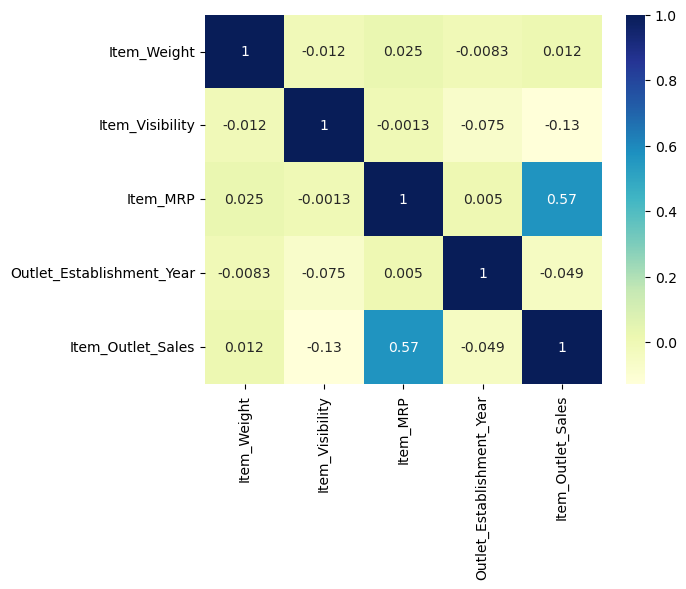

In [168]:
import seaborn as sns
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

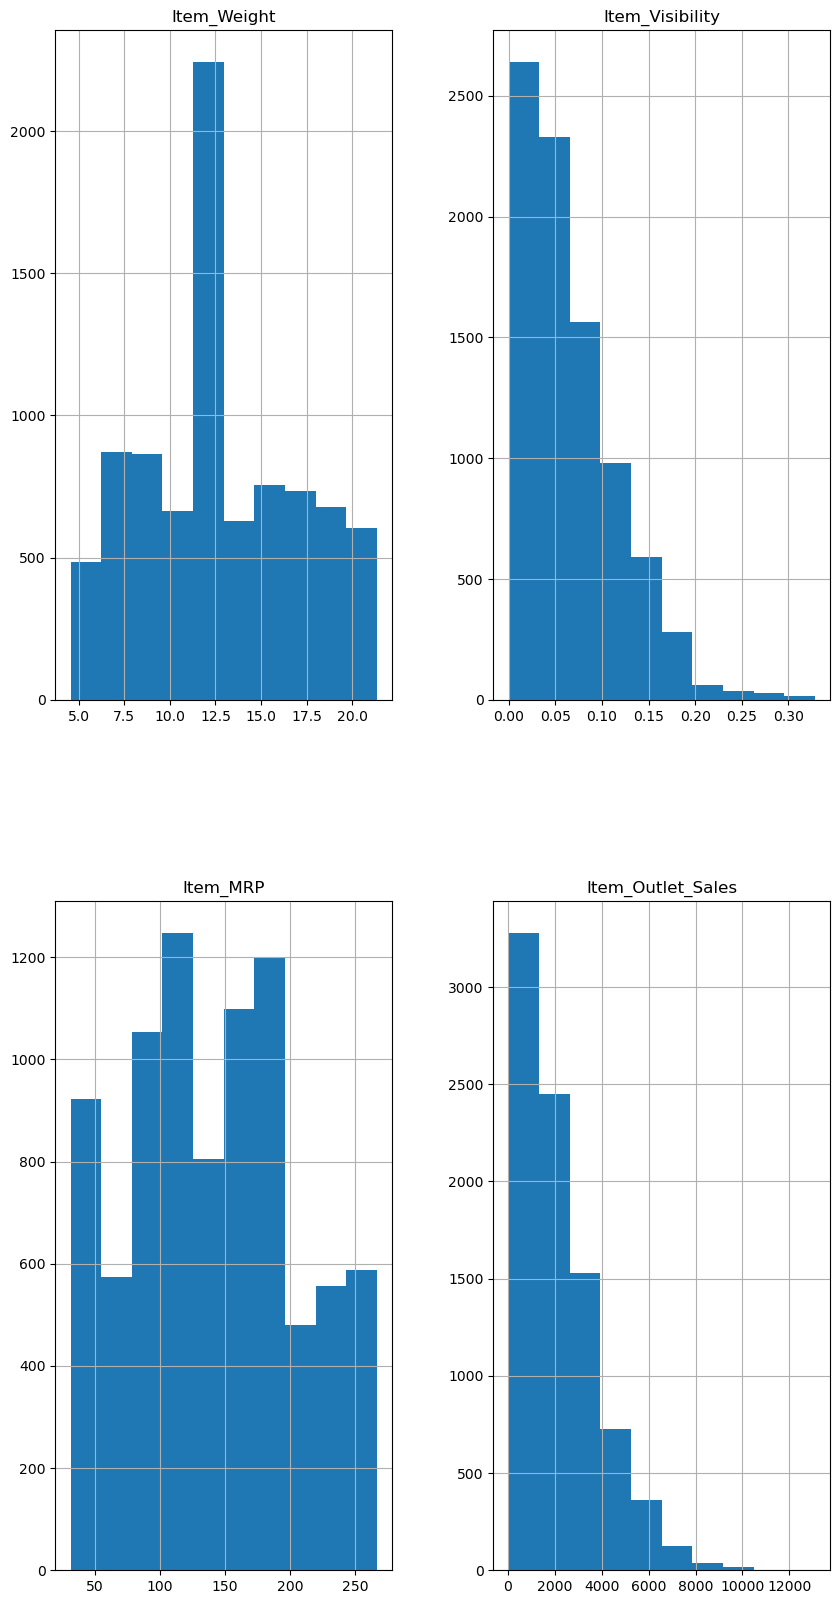

In [169]:
import matplotlib.pyplot as plt 
freqgraph = train.select_dtypes(include = ['float'])
freqgraph.hist(figsize = (10,20))
plt.show()

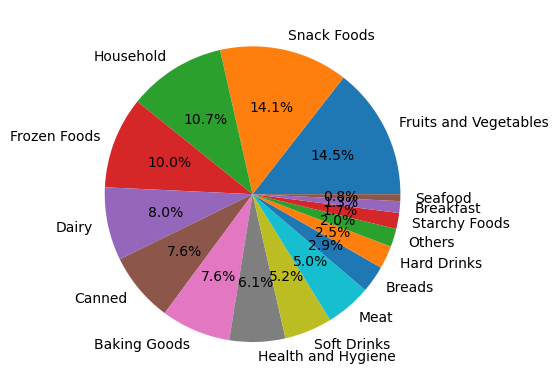

In [170]:
#Univariate Analysis
x = train['Item_Type'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

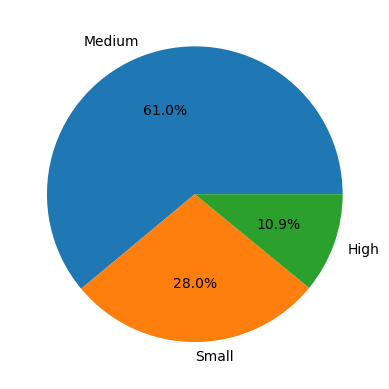

In [171]:
x = train['Outlet_Size'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

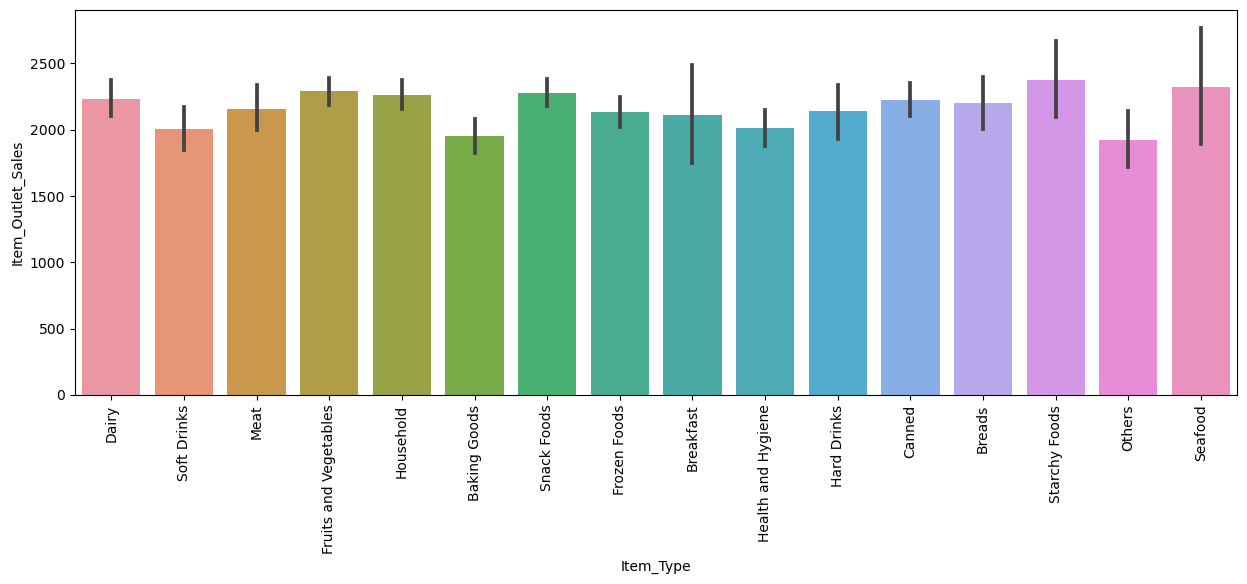

In [172]:
#Bivariate Analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.barplot(x=train['Item_Type'], y=train['Item_Outlet_Sales'])
plt.xticks(rotation='90')

In [173]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

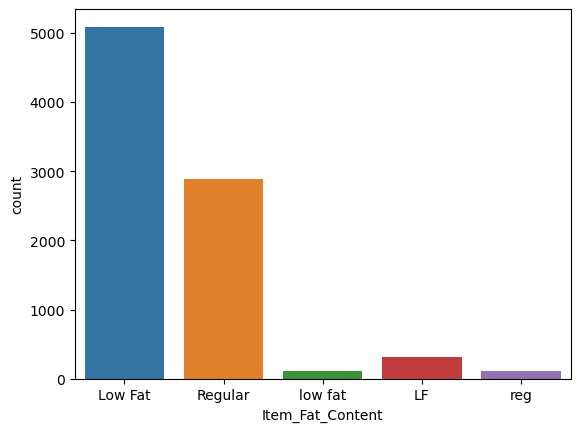

In [174]:
sns.countplot(x='Item_Fat_Content', data=train)
plt.show()

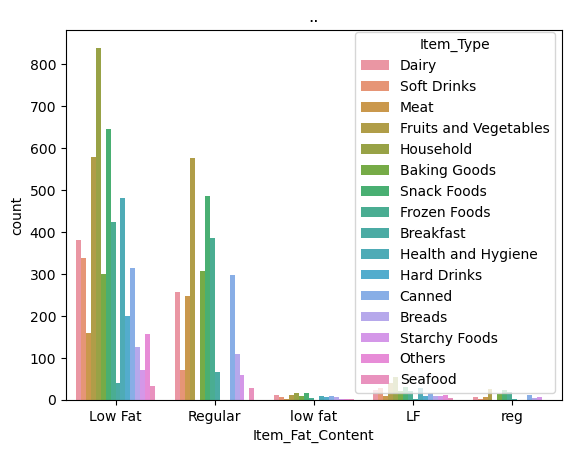

In [175]:

sns.countplot(x = 'Item_Fat_Content',  hue = 'Item_Type', data = train)
plt.title('..')
plt.show()


<AxesSubplot:>

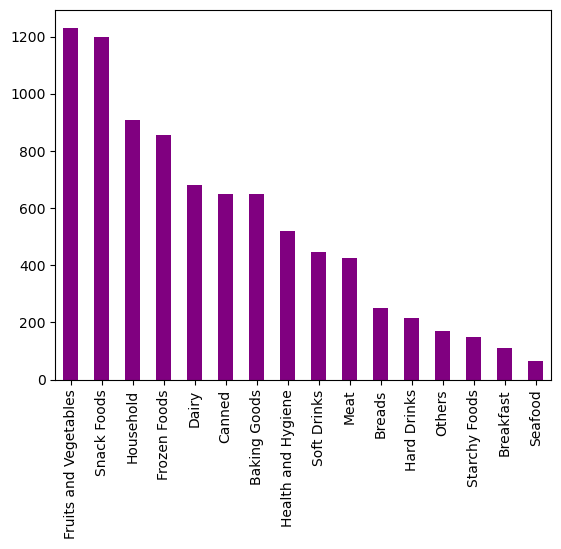

In [176]:
train['Item_Type'].value_counts().plot(kind='bar',color='purple')

<AxesSubplot:>

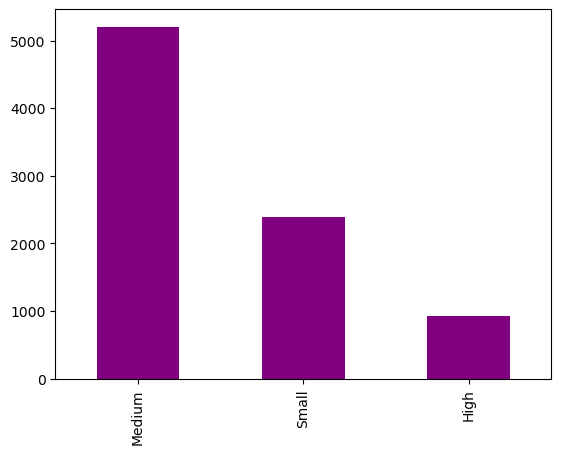

In [177]:
train['Outlet_Size'].value_counts().plot(kind='bar',color='purple')

<AxesSubplot:>

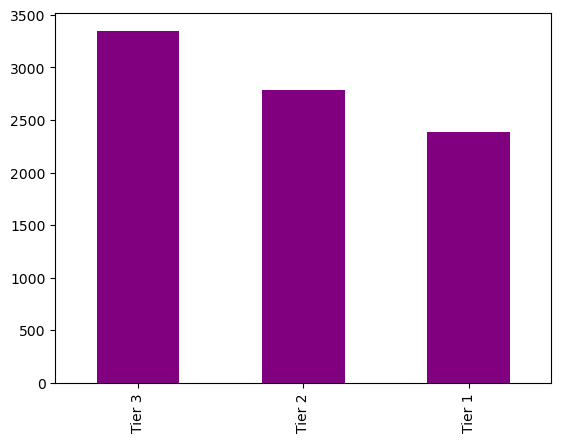

In [178]:
#Outlet_Location_Type	Outlet_Type
train['Outlet_Location_Type'].value_counts().plot(kind ='bar',color='purple')

<AxesSubplot:>

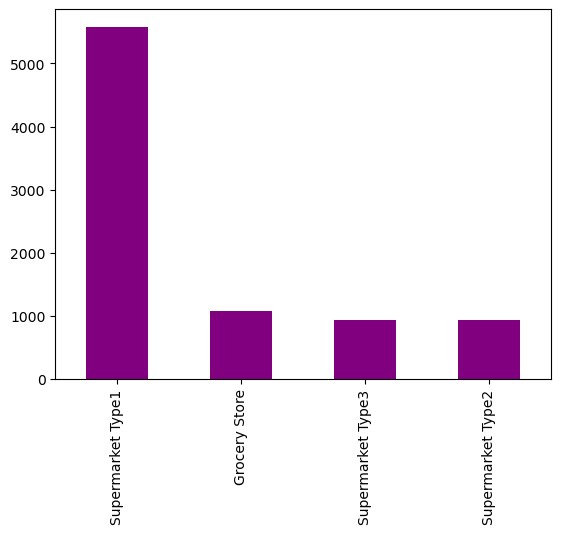

In [179]:
train['Outlet_Type'].value_counts().plot(kind='bar',color='purple')

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [181]:
train = train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [182]:
#to find the amount of quantity from total sales

train["Qty_Sold"] = (train["Item_Outlet_Sales"]/train["Item_MRP"])
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Qty_Sold
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,4.021967
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


In [183]:
obj = list(train.select_dtypes(include='object'))
obj

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [184]:
for col in obj:
    print('Frequency of categories for variable')
    print(train[col].value_counts())
    print("\n")
  

Frequency of categories for variable
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Frequency of categories for variable
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Frequency of categories for variable
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Frequency of categories for variable
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Frequency of categories for variable
Supermarket Type1

<AxesSubplot:>

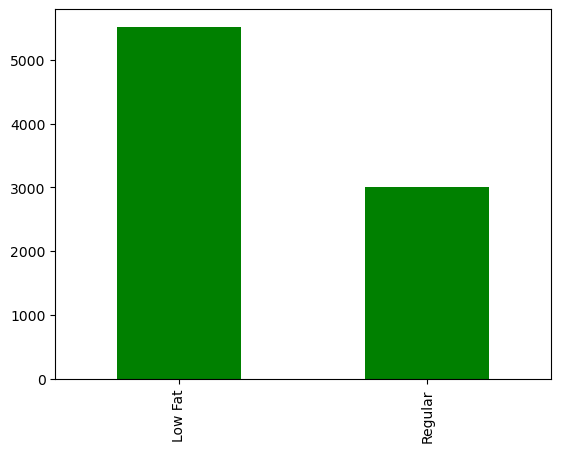

In [185]:
train = train.replace(to_replace ="low fat", value ="Low Fat")
train = train.replace(to_replace ="LF",value ="Low Fat")
train = train.replace(to_replace ="reg",value="Regular")
train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'Green')

In [186]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train.columns:
    train[col] = labelencoder.fit_transform(train[col])

In [187]:
#one hot encoding
train = pd.get_dummies(train,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=False)
print(train.shape)

(8523, 34)


In [188]:
train.columns.tolist()

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Qty_Sold',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Item_Type_0',
 'Item_Type_1',
 'Item_Type_2',
 'Item_Type_3',
 'Item_Type_4',
 'Item_Type_5',
 'Item_Type_6',
 'Item_Type_7',
 'Item_Type_8',
 'Item_Type_9',
 'Item_Type_10',
 'Item_Type_11',
 'Item_Type_12',
 'Item_Type_13',
 'Item_Type_14',
 'Item_Type_15',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3']

In [189]:
#Modeling
from sklearn.model_selection import train_test_split
x=train.drop(columns=['Qty_Sold'])
y=train['Qty_Sold']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [190]:
#linear regression
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9005470386720253

In [191]:
from sklearn.linear_model import Ridge, Lasso
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(x_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(x_test, y_test))

0.9005433141972705


In [192]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(x_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(x_test, y_test))

0.9005195225709406


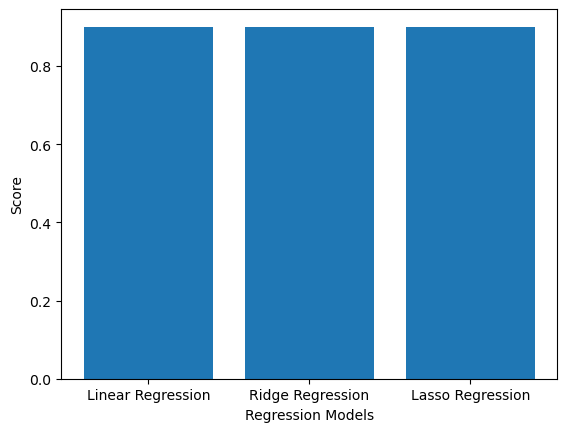

In [193]:
# Plotting the scores
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [lr.score(x_test, y_test),
         ridgeModelChosen.score(x_test, y_test),
         lassoModelChosen.score(x_test, y_test)]
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

In [194]:
#.RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
# Evaluate the model's performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared Score: ", r2)

Mean Squared Error:  5963.962114428155
R-squared Score:  0.9989110990975834


In [195]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print( "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print( "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [196]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [197]:
#XGBoost
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Create the XGBoost model and fit on the training data
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Evaluate the model using R-squared score
r2_score = r2_score(y_test, y_pred)
print("R-squared score:", r2_score)

Mean squared error: 10518.848595055431
R-squared score: 0.9980794673896687
